In [1]:
import torch

/Users/leo/miniconda3/envs/dropout-diffusion/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from model._vgg import _vgg

In [3]:
model = _vgg("D", batch_norm=True, init_weights=True, num_classes=10)

In [5]:
checkpoint = torch.load("model_best.pth.tar", map_location="cpu")

In [6]:
model.load_state_dict(checkpoint["state_dict"])

<All keys matched successfully>

In [11]:
bn_weights = []
def process_layer(layer):
    if isinstance(layer, torch.nn.BatchNorm2d):
        bn_weights.append(layer.weight.detach().cpu())
    elif len(list(layer.children())) > 0:
        for child in layer.children():
            process_layer(child)

In [12]:
process_layer(model)

In [14]:
variance = torch.load("/Users/leo/Downloads/variance_vgg_without_batch_norm (2).pth")

In [15]:
len(variance)

17

In [16]:
len(bn_weights)

13

In [17]:
variance = variance[:13]

In [19]:
norm_max = []
for i in range(13):
    temp = bn_weights[i] / torch.sqrt(variance[i])
    norm_max.append(torch.max(torch.abs(temp)).item())

In [20]:
norm_max

[2.0290586948394775,
 1.1026266813278198,
 0.5410735607147217,
 0.5094060301780701,
 0.35423317551612854,
 0.33859482407569885,
 0.25902095437049866,
 0.39991295337677,
 0.533149778842926,
 0.9076930284500122,
 1.491837978363037,
 1.7134259939193726,
 2.3568122386932373]

In [21]:
from matplotlib import pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


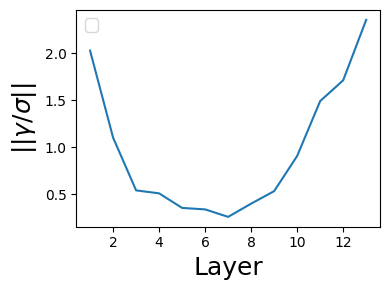

In [23]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("Layer", fontdict={'fontsize':18})
ax.set_ylabel(r"$||\gamma / \sigma||$", fontdict={'fontsize':18})
# major_xticks = list(range(20))
major_yticks = list(range(50, 110, 10))
#ax.set_ylim(50, 102)
#ax.set_yticks(major_yticks)
# ax.set_xticks(major_xticks)
#ax.set_title("Norm max variance at layer 20")
#ax.scatter(list(test.keys()), list(test.values()), color="red", label="variance")
bn = []
no_bn = []
plt.plot(list(range(1, 14)), norm_max)
# plt.plot(list(range(40)), [float(item) for item in acc5], 'b--', label="BN, train")
# plt.plot(list(range(40)), [float(item) for item in test_acc5], color='b',  label="BN, test")
# plt.plot(list(range(40)), [float(item) for item in acc5_no], 'r--', label="w/o BN, train")
# plt.plot(list(range(40)), [float(item) for item in test_acc5_no], color='r', label="w/o BN, test")
ax.legend(fontsize=12)
fig.tight_layout()
plt.savefig("gamma_sigma_vgg.png", dpi=250)

In [2]:
import numpy as np

In [3]:
a = np.array([2.0290586948394775,
 1.1026266813278198,
 0.5410735607147217,
 0.5094060301780701,
 0.35423317551612854,
 0.33859482407569885,
 0.25902095437049866,
 0.39991295337677,
 0.533149778842926,
 0.9076930284500122,
 1.491837978363037,
 1.7134259939193726,
 2.3568122386932373])

In [4]:
np.cumprod(a)

array([2.02905869, 2.23729425, 1.21054077, 0.61665677, 0.21844028,
       0.07396275, 0.0191579 , 0.00766149, 0.00408472, 0.00370767,
       0.00553125, 0.00947739, 0.02233642])